In [68]:
from IPython.display import Image
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps   
import sqlalchemy as sa

import sys
sys.path.append(r'C:\Users\kevin\Documents\6. Data Engineer Project\4. PostgreSQL\2. Config')

import c_postgresql

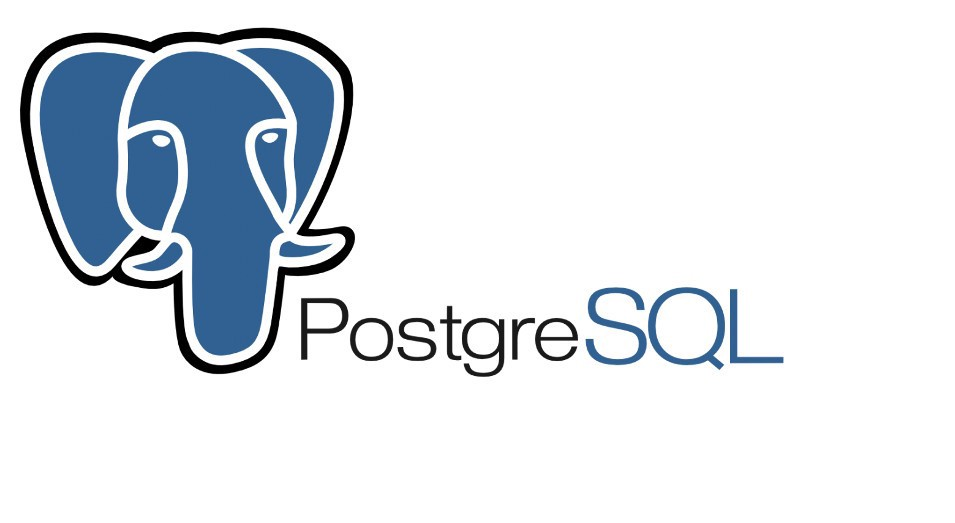

In [69]:
from IPython.display import Image
image_postgresql = c_postgresql.image_postgresql
i_postgresql = Image (filename = image_postgresql)
display(i_postgresql)

In [70]:
# Postgersql variables
postgresql_username = c_postgresql.username
postgresql_password = c_postgresql.password
postgresql_hostname = c_postgresql.hostname
postgresql_port = c_postgresql.port

In [71]:
def db_tables (driver, username, password, hostname, port, db_name):

    conn = sa.create_engine(f"{driver}://{username}:{password}@{hostname}:{port}/{db_name}")

    query_tables = """
    select table_catalog, table_schema, table_name, table_type
    from information_schema.tables
    where table_schema = 'public' and table_type = 'BASE TABLE';
    """

    print (db_name, "Database Exploration: ")
    df_query_tables = sqlio.read_sql (query_tables, conn)
    display (df_query_tables)

    for db in df_query_tables ["table_name"]:
        print("This is the table name", db)
        query = f'SELECT * FROM "{db}"'
        df_query = sqlio.read_sql_query(query, conn)
        display (df_query.head())

    return

In [72]:
db_tables_Employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

Employees Database Exploration: 


,table_catalog,table_schema,table_name,table_type
0,Employees,public,dept_emp,BASE TABLE
1,Employees,public,employees,BASE TABLE
2,Employees,public,dept_manager,BASE TABLE
3,Employees,public,salaries,BASE TABLE
4,Employees,public,titles,BASE TABLE
5,Employees,public,departments,BASE TABLE
6,Employees,public,cartesianA,BASE TABLE
7,Employees,public,cartesianB,BASE TABLE
8,Employees,public,timezones,BASE TABLE


This is the table name dept_emp


,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


This is the table name employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


This is the table name dept_manager


,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,9999-01-01
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,9999-01-01
4,d003,110183,1985-01-01,1992-03-21


This is the table name salaries


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


This is the table name titles


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


This is the table name departments


,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


This is the table name cartesianA


,id
0,1
1,2
2,3
3,1
4,2


This is the table name cartesianB


,id
0,1
1,2
2,3
3,1
4,2


This is the table name timezones


,ts,tz
0,2000-01-01 10:00:00,2000-01-01 15:00:00+00:00


In [73]:
# Connection sqlalchemy

def sa_conn_db (driver, username, password, hostname, port, db_name):
    conn = sa.create_engine(f"{driver}://{username}:{password}@{hostname}:{port}/{db_name}")
    return conn

# Connection psycopg2

def ps_conn_db (username, password, hostname, port, db_name):
    conn = ps.connect(
        user = username,
        password = password,
        host = hostname,
        port = port,
        database = db_name
    )
    return conn

In [74]:
# Table Overview sqlalchemy

def sa_table_ov (tables, conn):
    for table in tables:  
        print ("This is an overview of the table", table)
        df_db = sqlio.read_sql (f'select * from "{table}"', conn)
        display(df_db.head())
    return df_db

# Table Overview psycopg2

def ps_table_ov(tables, conn):
    query_list = []
    
    for table in tables:
        # Create a cursor
        cursor = conn.cursor()
        
        # Execute the SQL query
        int_query = f'select * from "{table}"'
        cursor.execute(int_query)
        
        # Fetch all the results
        results = cursor.fetchall()
        
        # Create a DataFrame from the results
        columns = [i[0] for i in cursor.description]
        query = pd.DataFrame(results, columns=columns)
        
        print("This is an overview of the table:", table)
        display(query.head())
        
        # Append the DataFrame to the query_list
        query_list.append(query)

        # /Close the cursor and connection/
        cursor.close()

    return query_list

In [75]:
# PostgreSQL Query with sqlalchemy connection

def sa_query (sql_query, conn, comment):

    query = sqlio.read_sql (sql_query, conn)
    print (comment)
    display (query)

    return query

# PostgreSQL Query with psycopg2 connection

def ps_query (sql_query, conn, question):
    # /Create a cursor/
    cursor = conn.cursor()

    # /Execute the SQL query/
    int_query = sql_query

    cursor.execute(int_query)

    # /Fetch all the results/
    results = cursor.fetchall()

    # /Create a DataFrame from the results/
    columns = [i[0] for i in cursor.description]
    query = pd.DataFrame(results, columns=columns)

    # /Close the cursor and connection/
    cursor.close()
    conn.close()

    # /Display the results/
    print(question + "\n", int_query)
    display(query)

    return

# 60. Aggregate Functions

In [76]:
# What database should I use for these exercises?
# Name: Employees
# Question 1: What is the average salary for the company?
# Table: Salaries

conn_Employees = sa_conn_db ("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

print ("Salary Table overview")
df_salary = sqlio.read_sql ("select * from salaries", conn_Employees)
display (df_salary.head())

print ("\nQuestion 1: What is the average salary for the company?\n")
print ("select avg(salary) as avg_salary from salaries")
query_avg_salary = "select avg(salary) as avg_salary from salaries"
df_avg_salary = sqlio.read_sql (query_avg_salary, conn_Employees)
display(df_avg_salary.head())

Salary Table overview


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25



Question 1: What is the average salary for the company?

select avg(salary) as avg_salary from salaries


,avg_salary
0,63810.744836


In [77]:
# Question 2: What year was the youngest person born in the company?
# Table: employees

print ("This is an overview of the table employees")
df_employees = sqlio.read_sql ("select * from employees", conn_Employees)
display(df_employees.head())

youngest_person = sqlio.read_sql ("""
    select first_name, min(birth_date) as youngest_employee
    from employees
    group by first_name
    limit 1
""", conn_Employees)
print ("\nQuestion 2: What year was the youngest person born in the company?: ")
print ("select first_name, min(birth_date) as youngest_employee\nfrom employees\ngroup by first_name\nlimit 1")
display (youngest_person)

This is an overview of the table employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12



Question 2: What year was the youngest person born in the company?: 
select first_name, min(birth_date) as youngest_employee
from employees
group by first_name
limit 1


,first_name,youngest_employee
0,Aamer,1952-02-15


In [78]:
# What database should I use for these exercises?
# Name: France
db_tables_employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "France")

France Database Exploration: 


,table_catalog,table_schema,table_name,table_type
0,France,public,regions,BASE TABLE
1,France,public,departments,BASE TABLE
2,France,public,towns,BASE TABLE


This is the table name regions


,id,code,capital,name
0,1,01,97105,Guadeloupe
1,2,02,97209,Martinique
2,3,03,97302,Guyane
3,4,04,97411,La Réunion
4,5,11,75056,Île-de-France


This is the table name departments


,id,code,capital,region,name
0,1,01,01053,82,Ain
1,2,02,02408,22,Aisne
2,3,03,03190,83,Allier
3,4,04,04070,93,Alpes-de-Haute-Provence
4,5,05,05061,93,Hautes-Alpes


This is the table name towns


,id,code,article,name,department
0,1,001,None,Abergement-Clémenciat,01
1,2,002,None,Abergement-de-Varey,01
2,3,004,None,Ambérieu-en-Bugey,01
3,4,005,None,Ambérieux-en-Dombes,01
4,5,006,None,Ambléon,01


In [79]:
# -- Question 1: How many towns are there in france?
# Table: Towns
conn_France = sa_conn_db ("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "France")
df_France = sa_table_ov (["towns"], conn_France)

n_of_towns = sqlio.read_sql ("select count(distinct(name)) as n_of_towns_france from towns", conn_France)
print ("\nQuestion 1: How many towns are there in france?: ")
print ("select count(distinct(name)) as n_of_towns_france from towns")
display (n_of_towns)

This is an overview of the table towns


,id,code,article,name,department
0,1,001,None,Abergement-Clémenciat,01
1,2,002,None,Abergement-de-Varey,01
2,3,004,None,Ambérieu-en-Bugey,01
3,4,005,None,Ambérieux-en-Dombes,01
4,5,006,None,Ambléon,01



Question 1: How many towns are there in france?: 
select count(distinct(name)) as n_of_towns_france from towns


,n_of_towns_france
0,33954


In [80]:
 # What database should I use for these exercises?
 # Name: World

 db_tables_World = db_tables ("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "World")

World Database Exploration: 


,table_catalog,table_schema,table_name,table_type
0,World,public,city,BASE TABLE
1,World,public,country,BASE TABLE
2,World,public,countrylanguage,BASE TABLE


This is the table name city


,id,name,countrycode,district,population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


This is the table name country


,code,name,continent,region,surfacearea,indepyear,population,lifeexpectancy,gnp,gnpold,localname,governmentform,headofstate,capital,code2
0,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
1,NLD,Netherlands,Europe,Western Europe,41526.0,1581.0,15864000,78.3,371362.0,360478.0,Nederland,Constitutional Monarchy,Beatrix,5.0,NL
2,ANT,Netherlands Antilles,North America,Caribbean,800.0,NaN,217000,74.7,1941.0,NaN,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,Beatrix,33.0,AN
3,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
4,DZA,Algeria,Africa,Northern Africa,2381741.0,1962.0,31471000,69.7,49982.0,46966.0,Al-Jazair/Algérie,Republic,Abdelaziz Bouteflika,35.0,DZ


This is the table name countrylanguage


,countrycode,language,isofficial,percentage
0,AFG,Pashto,True,52.4
1,NLD,Dutch,True,95.6
2,ANT,Papiamento,True,86.2
3,ALB,Albaniana,True,97.9
4,DZA,Arabic,True,86.0


In [81]:
# -- Question 1: How many official languages are there?
# -- Table: countrylanguage

conn_World = sa_conn_db ("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "World")
df_countrylanguage = sa_table_ov (["countrylanguage"], conn_World)

n_official_lenguage = sqlio.read_sql ("""
select count(language) as n_official_lenguage
from countrylanguage
where isofficial = 'True' and language is not null
""", conn_World)
print ("\nQuestion 1: How many official languages are there?: ")
print ("select count(language) as n_official_lenguage\nfrom countrylanguage\nwhere isofficial = 'True' and language is not null")
display (n_official_lenguage)


This is an overview of the table countrylanguage


,countrycode,language,isofficial,percentage
0,AFG,Pashto,True,52.4
1,NLD,Dutch,True,95.6
2,ANT,Papiamento,True,86.2
3,ALB,Albaniana,True,97.9
4,DZA,Arabic,True,86.0



Question 1: How many official languages are there?: 
select count(language) as n_official_lenguage
from countrylanguage
where isofficial = 'True' and language is not null


,n_official_lenguage
0,238


In [82]:
# -- Question 2: What is the average life expectancy in the world?
# -- Table: country

df_country = sa_table_ov (["country"], conn_World)

query_avg_life_expectancy = sqlio.read_sql ("""
select avg (lifeexpectancy) as avg_life_expectancy
from country
""", conn_World)

print ("\nQuestion 2: What is the average life expectancy in the world?")
print ("select avg (lifeexpectancy) as avg_life_expectancy\nfrom country")

display(query_avg_life_expectancy)

This is an overview of the table country


,code,name,continent,region,surfacearea,indepyear,population,lifeexpectancy,gnp,gnpold,localname,governmentform,headofstate,capital,code2
0,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
1,NLD,Netherlands,Europe,Western Europe,41526.0,1581.0,15864000,78.3,371362.0,360478.0,Nederland,Constitutional Monarchy,Beatrix,5.0,NL
2,ANT,Netherlands Antilles,North America,Caribbean,800.0,NaN,217000,74.7,1941.0,NaN,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,Beatrix,33.0,AN
3,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
4,DZA,Algeria,Africa,Northern Africa,2381741.0,1962.0,31471000,69.7,49982.0,46966.0,Al-Jazair/Algérie,Republic,Abdelaziz Bouteflika,35.0,DZ



Question 2: What is the average life expectancy in the world?
select avg (lifeexpectancy) as avg_life_expectancy
from country


,avg_life_expectancy
0,66.486036


In [83]:
# -- Question 3: What is the average population for cities in the netherlands?
# -- Table: city

df_city = sa_table_ov (["city"], conn_World)

query_avg_population_netherlands = sqlio.read_sql ("""
select avg (population) as avg_population_netherlands
from city
where countrycode = 'NLD'
""", conn_World)

print ("\nQuestion 3: What is the average population for cities in the netherlands?: ")
print ("select avg (population) as avg_population_netherlands\nfrom city\nwhere countrycode = 'NLD'")

display(query_avg_population_netherlands)


This is an overview of the table city


,id,name,countrycode,district,population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200



Question 3: What is the average population for cities in the netherlands?: 
select avg (population) as avg_population_netherlands
from city
where countrycode = 'NLD'


,avg_population_netherlands
0,185001.75


# 69. Comparison Operators

In [84]:
# What database should I use for these exercises?
# Name: Store
db_tables_Store = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

# Connection Database Store:
conn_Store = sa_conn_db ("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

Store Database Exploration: 


,table_catalog,table_schema,table_name,table_type
0,Store,public,categories,BASE TABLE
1,Store,public,inventory,BASE TABLE
2,Store,public,products,BASE TABLE
3,Store,public,reorder,BASE TABLE
4,Store,public,customers,BASE TABLE
5,Store,public,cust_hist,BASE TABLE
6,Store,public,orders,BASE TABLE
7,Store,public,orderlines,BASE TABLE


This is the table name categories


,category,categoryname
0,1,Action
1,2,Animation
2,3,Children
3,4,Classics
4,5,Comedy


This is the table name inventory


,prod_id,quan_in_stock,sales
0,1,138,9
1,2,118,19
2,3,228,11
3,4,279,12
4,5,382,13


This is the table name products


,prod_id,category,title,actor,price,special,common_prod_id
0,1,14,ACADEMY ACADEMY,PENELOPE GUINESS,25.99,0,1976
1,2,6,ACADEMY ACE,EWAN RICKMAN,20.99,0,6289
2,3,6,ACADEMY ADAPTATION,VIVIEN KAHN,28.99,0,7173
3,4,3,ACADEMY AFFAIR,ALAN MARX,14.99,0,8042
4,5,3,ACADEMY AFRICAN,CARRIE HANNAH,11.99,1,2183


This is the table name reorder


,prod_id,date_low,quan_low,date_reordered,quan_reordered,date_expected


This is the table name customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M


This is the table name cust_hist


,customerid,orderid,prod_id
0,7888,1,9117
1,7888,1,3353
2,7888,1,2778
3,7888,1,4774
4,7888,1,3648


This is the table name orders


,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31
3,4,2004-01-28,17019,106.67,8.80,115.47
4,5,2004-01-09,14771,256.00,21.12,277.12


This is the table name orderlines


,orderlineid,orderid,prod_id,quantity,orderdate
0,1,1,9117,1,2004-01-27
1,2,1,3353,3,2004-01-27
2,3,1,2778,2,2004-01-27
3,4,1,4774,2,2004-01-27
4,5,1,3648,2,2004-01-27


In [85]:
# -- How many female customers do we have from the state of Oregon (OR)?

print ("Database: Store. This is an overview of the table customers")
df_customers = sqlio.read_sql ("select * from customers", conn_Store)
display(df_customers.head())

n_female_oregon = sqlio.read_sql ("""
select count(gender) as n_female_oregon 
from customers
where gender = 'F' and state = 'OR'
""", conn_Store)

print ("\n-- How many female customers do we have from the state of Oregon (OR)?: ")
print ("select count(gender) as n_female_oregon \nfrom customers\nwhere gender = 'F' and state = 'OR'")

display (n_female_oregon)

Database: Store. This is an overview of the table customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M



-- How many female customers do we have from the state of Oregon (OR)?: 
select count(gender) as n_female_oregon 
from customers
where gender = 'F' and state = 'OR'


,n_female_oregon
0,106


In [86]:
# -- Who over the age of 44 has an income of 100 000 or more? (excluding 44)

print ("Database: Store. This is an overview of the table customers")
display(df_customers.head())

over_44_income_100k = sqlio.read_sql ("""
select count (income) as over_44_income_100k
from customers
where income >= 100000 and age > 44
""", conn_Store)

print ("\n-- Who over the age of 44 has an income of 100 000 or more? (excluding 44)")
print ("select count (income) as over_44_income_100k\nfrom customers\nwhere income >= 100000 and age > 44")

display (over_44_income_100k)

Database: Store. This is an overview of the table customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M



-- Who over the age of 44 has an income of 100 000 or more? (excluding 44)
select count (income) as over_44_income_100k
from customers
where income >= 100000 and age > 44


,over_44_income_100k
0,2497


In [87]:
# -- Who between the ages of 30 and 50 has an income less than 50 000?

print ("Database: Store. This is an overview of the table customers")
display(df_customers.head())

between_30and50_more50K = sqlio.read_sql ("""
select count (income) as between_30and50_more50K
from customers
where (age >= 30 and age <= 50) and income < 50000
""", conn_Store)

print ("\n-- Who between the ages of 30 and 50 has an income less than 50 000?")
print ("select count (income) as between_30and50_more50K\nfrom customers\nwhere (age >= 30 and age <= 50) and income < 50000")

display (between_30and50_more50K)


Database: Store. This is an overview of the table customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M



-- Who between the ages of 30 and 50 has an income less than 50 000?
select count (income) as between_30and50_more50K
from customers
where (age >= 30 and age <= 50) and income < 50000


,between_30and50_more50k
0,2362


In [88]:
# -- What is the average income between the ages of 20 and 50? (Excluding 20 and 50)

print ("Database: Store. This is an overview of the table customers")
display(df_customers.head())

avg_income_20and50 = sqlio.read_sql ("""
select avg (income) as avg_income_20and50
from customers
where (age > 20 and age < 50)
""", conn_Store)

print ("\nWhat is the average income between the ages of 20 and 50? (Excluding 20 and 50): ")
display (avg_income_20and50)


Database: Store. This is an overview of the table customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M



What is the average income between the ages of 20 and 50? (Excluding 20 and 50): 


,avg_income_20and50
0,59409.926241


# 78. Null Value Coalescing

In [89]:
# https://www.db-fiddle.com/f/PnGNcaPYfGoEDvfexzEUA/0
# Question: 
# Assuming a students minimum age for the class is 15, what is the average age of a student?

# ---SELECT coalesce (name, 'TBD'), coalesce (lastname, 'TBD') from "Student";

In [90]:
# https://www.db-fiddle.com/f/PnGNcaPYfGoEDvfexzEUA/0
# Question: 
# Replace all empty first or last names with a default?

# ---SELECT avg(coalesce(age, 15)) from "Student";

# 80. Valued Logic

In [91]:
# DB: Store / Table: customers
db_tables_Store = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

# Connection Database Store:
conn_Store = sa_conn_db ("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

Store Database Exploration: 


,table_catalog,table_schema,table_name,table_type
0,Store,public,categories,BASE TABLE
1,Store,public,inventory,BASE TABLE
2,Store,public,products,BASE TABLE
3,Store,public,reorder,BASE TABLE
4,Store,public,customers,BASE TABLE
5,Store,public,cust_hist,BASE TABLE
6,Store,public,orders,BASE TABLE
7,Store,public,orderlines,BASE TABLE


This is the table name categories


,category,categoryname
0,1,Action
1,2,Animation
2,3,Children
3,4,Classics
4,5,Comedy


This is the table name inventory


,prod_id,quan_in_stock,sales
0,1,138,9
1,2,118,19
2,3,228,11
3,4,279,12
4,5,382,13


This is the table name products


,prod_id,category,title,actor,price,special,common_prod_id
0,1,14,ACADEMY ACADEMY,PENELOPE GUINESS,25.99,0,1976
1,2,6,ACADEMY ACE,EWAN RICKMAN,20.99,0,6289
2,3,6,ACADEMY ADAPTATION,VIVIEN KAHN,28.99,0,7173
3,4,3,ACADEMY AFFAIR,ALAN MARX,14.99,0,8042
4,5,3,ACADEMY AFRICAN,CARRIE HANNAH,11.99,1,2183


This is the table name reorder


,prod_id,date_low,quan_low,date_reordered,quan_reordered,date_expected


This is the table name customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M


This is the table name cust_hist


,customerid,orderid,prod_id
0,7888,1,9117
1,7888,1,3353
2,7888,1,2778
3,7888,1,4774
4,7888,1,3648


This is the table name orders


,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31
3,4,2004-01-28,17019,106.67,8.80,115.47
4,5,2004-01-09,14771,256.00,21.12,277.12


This is the table name orderlines


,orderlineid,orderid,prod_id,quantity,orderdate
0,1,1,9117,1,2004-01-27
1,2,1,3353,3,2004-01-27
2,3,1,2778,2,2004-01-27
3,4,1,4774,2,2004-01-27
4,5,1,3648,2,2004-01-27


In [92]:
"""
Question: display the null values as "No Address"
"""

print ("Database: Store. This is an overview of the table customers")
display(df_customers.head())

nuull_to_NoAddress = sqlio.read_sql ("""
select coalesce (address2, 'No Address') as null_to_NoAddress
from customers
""", conn_Store)

print ("\nQuestion: display the null values as 'No Address': ")
print ("select coalesce (address2, 'No Address') as null_to_NoAddress\nfrom customers")

display (nuull_to_NoAddress.head())


Database: Store. This is an overview of the table customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M



Question: display the null values as 'No Address': 
select coalesce (address2, 'No Address') as null_to_NoAddress
from customers


,null_to_noaddress
0,No Address
1,No Address
2,No Address
3,No Address
4,No Address


In [93]:
"""
Question: Show all adress2 and confirm how many values there are
"""

print ("Database: Store. This is an overview of the table customers")
display(df_customers.head())

NotNull_3VL = sqlio.read_sql ("""
select *
from customers
where address2 is not null
""", conn_Store)

print ("\nQuestion: Show all adress2 and confirm how many values there are: ")
print ("select *\nfrom customers\nwhere address2 is not null")
display (NotNull_3VL)


count_null_address2 = sqlio.read_sql ("""
select count (address2) as count_null_address2
from customers
where address2 is null
""", conn_Store)

print ("\nConfirming nulls: ")
print ("select count (address2) as count_null_address2\nfrom customers\nwhere address2 is null")
display (count_null_address2)

Database: Store. This is an overview of the table customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M



Question: Show all adress2 and confirm how many values there are: 
select *
from customers
where address2 is not null


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender



Confirming nulls: 
select count (address2) as count_null_address2
from customers
where address2 is null


,count_null_address2
0,0


In [94]:
"""
Question: Show all values where lastname is not null and age is null
"""

print ("Database: Store. This is an overview of the table customers")
display(df_customers.head())

lastName_to_Empty = sqlio.read_sql ("""
SELECT coalesce(lastName, 'Empty'), *
from customers
where age is null;
""", conn_Store)

print ("\nQuestion: Show all values where lastname is not null and age is null: ")
print ("SELECT coalesce(lastName, 'Empty'), *\nfrom customers\nwhere age is null;")

display (lastName_to_Empty.head())

count_null_lastName = sqlio.read_sql ("""
select count (lastName) as count_null_lastName
from customers
where lastName is null
""", conn_Store)

print ("\nConfirming nulls: ")
print ("select count (lastName) as count_null_lastName\nfrom customers\nwhere lastName is null")
display (count_null_lastName)


Database: Store. This is an overview of the table customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M



Question: Show all values where lastname is not null and age is null: 
SELECT coalesce(lastName, 'Empty'), *
from customers
where age is null;


,coalesce,customerid,firstname,lastname,address1,address2,city,state,zip,country,...,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender



Confirming nulls: 
select count (lastName) as count_null_lastName
from customers
where lastName is null


,count_null_lastname
0,0


# 82. BETWEEN + AND

In [95]:
# -- Who between the ages of 30 and 50 has an income less than 50 000? (include 30 and 50 in the results)

print ("Database: Store. This is an overview of the table customers")
display(df_customers.head())

income50k_30and50 = sqlio.read_sql ("""
select count(customerid) as income50k_30and50
from customers
where (age between 30 and 50) and income < 50000
""", conn_Store)

print ("\n-- Who between the ages of 30 and 50 has an income less than 50 000? (include 30 and 50 in the results): ")
print ("select count(customerid) as income50k_30and50\nfrom customers\nwhere (age between 30 and 50) and income < 50000")
display (income50k_30and50)

Database: Store. This is an overview of the table customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M



-- Who between the ages of 30 and 50 has an income less than 50 000? (include 30 and 50 in the results): 
select count(customerid) as income50k_30and50
from customers
where (age between 30 and 50) and income < 50000


,income50k_30and50
0,2362


In [96]:
# -- What is the average income between the ages of 20 and 50? (Including 20 and 50)

print ("Database: Store. This is an overview of the table customers")
display(df_customers.head())

income_20and50 = sqlio.read_sql ("""
select avg (income) as income_20and50
from customers
where age between 20 and 50
""", conn_Store)

print ("\n-- What is the average income between the ages of 20 and 50? (Including 20 and 50): ")
print ("select avg (income) as income_20and50\nfrom customers\nwhere age between 20 and 50")

display (income_20and50)

Database: Store. This is an overview of the table customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M



-- What is the average income between the ages of 20 and 50? (Including 20 and 50): 
select avg (income) as income_20and50
from customers
where age between 20 and 50


,income_20and50
0,59361.925909


# 84. IN Keyword

In [97]:
# DB: Store / Table: orders
# Question: How many orders were made by customer 7888, 1082, 12808, 9623

print ("Database: Store. This is an overview of the table orders")
df_orders = sqlio.read_sql ("select * from orders", conn_Store)
display(df_orders.head())

n_orders = sqlio.read_sql ("""
select count (orderid) as n_orders
from orders
where customerid in (7888, 1082, 12808, 9623)
""", conn_Store)

print ("\nQuestion: How many orders were made by customer 7888, 1082, 12808, 9623: ")
print ("select count (orderid) as n_orders\nfrom orders\nwhere customerid in (7888, 1082, 12808, 9623)")

display (n_orders)

Database: Store. This is an overview of the table orders


,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31
3,4,2004-01-28,17019,106.67,8.80,115.47
4,5,2004-01-09,14771,256.00,21.12,277.12



Question: How many orders were made by customer 7888, 1082, 12808, 9623: 
select count (orderid) as n_orders
from orders
where customerid in (7888, 1082, 12808, 9623)


,n_orders
0,6


In [98]:
# DB: World / Table: city
# Question: How many cities are in the district of Zuid-Holland, Noord-Brabant and Utrecht?

print ("Database: World. This is an overview of the table city")
display(df_city.head())

n_cities = sqlio.read_sql ("""
select count (id) as n_cities
from city
where district in ('Zuid-Holland', 'Noord-Brabant', 'Utrecht')
""", conn_World)

print ("\nQuestion: How many cities are in the district of Zuid-Holland, Noord-Brabant and Utrecht?: ")
print ("select count (id) as n_cities\nfrom city\nwhere district in ('Zuid-Holland', 'Noord-Brabant', 'Utrecht')")

display (n_cities)


Database: World. This is an overview of the table city


,id,name,countrycode,district,population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200



Question: How many cities are in the district of Zuid-Holland, Noord-Brabant and Utrecht?: 
select count (id) as n_cities
from city
where district in ('Zuid-Holland', 'Noord-Brabant', 'Utrecht')


,n_cities
0,12


# 86. Like Keyword

In [99]:
"""
DB: Employees / Table: employees
Question: Find the age of all employees who's name starts with M.
"""

question = "Question: Find the age of all employees whose name starts with M.: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
SELECT emp_no, first_name, EXTRACT (YEAR FROM AGE(birth_date)) as "age"
FROM employees
WHERE first_name ILIKE 'M%';
"""

name_starts_M = ps_query (query, ps_conn_Employees, question)

Question: Find the age of all employees whose name starts with M.: 
 
SELECT emp_no, first_name, EXTRACT (YEAR FROM AGE(birth_date)) as "age"
FROM employees
WHERE first_name ILIKE 'M%';



,emp_no,first_name,age
0,10011,Mary,69
1,10020,Mayuko,70
2,10042,Magy,67
3,10044,Mingsen,61
4,10045,Moss,65
...,...,...,...
30722,499966,Mihalis,67
30723,499969,Masanao,62
30724,499975,Masali,70
30725,499977,Martial,67


In [100]:
"""
DB: Employees
Table: employees
Question: How many people's name start with A and end with R?
"""

question = "How many people's name start with A and end with R?: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
SELECT count(emp_no) as name_startsA_endR
FROM employees
WHERE first_name ILIKE 'A%R';
"""

name_startsA_endR = ps_query (query, ps_conn_Employees, question)

How many people's name start with A and end with R?: 
 
SELECT count(emp_no) as name_startsA_endR
FROM employees
WHERE first_name ILIKE 'A%R';



,name_startsa_endr
0,1846


In [101]:
"""
DB: Store
Table: customers
Question: How many people's zipcode have a 2 in it?. 
"""

question = "How many people's zipcode have a 2 in it?: "

ps_conn_Store = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

query = """
SELECT count(customerid) as zipcode_wt_2
FROM customers
WHERE zip::text ilike '%2%';
"""

zipcode_wt_2 = ps_query (query, ps_conn_Store, question)


How many people's zipcode have a 2 in it?: 
 
SELECT count(customerid) as zipcode_wt_2
FROM customers
WHERE zip::text ilike '%2%';



,zipcode_wt_2
0,4211


In [102]:
"""
DB: Store
Table: customers
Question: How many people's zipcode start with 2 with the 3rd character being a 1.
"""

question = "How many people's zipcode start with 2 with the 3rd character being a 1: "

ps_conn_Store = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

query = """
SELECT count(customerid) as zip_start2_thirth1
FROM customers
WHERE zip::text ilike '2_1%';
"""

zip_start2_thirth1 = ps_query (query, ps_conn_Store, question)

How many people's zipcode start with 2 with the 3rd character being a 1: 
 
SELECT count(customerid) as zip_start2_thirth1
FROM customers
WHERE zip::text ilike '2_1%';



,zip_start2_thirth1
0,109


In [103]:
"""
DB: Store
Table: customers
Question: Which states have phone numbers starting with 302?
"""

""" print ("Database: Store. This is an overview of the table customers")
display(df_customers.head()) """

question = "Which states have phone numbers starting with 302?: "

ps_conn_Store = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

query = """
SELECT coalesce(state, 'No State') as state, phone as phone_start302
FROM customers
WHERE phone::text ilike '302%';
"""

phone_start302 = ps_query (query, ps_conn_Store, question)

Which states have phone numbers starting with 302?: 
 
SELECT coalesce(state, 'No State') as state, phone as phone_start302
FROM customers
WHERE phone::text ilike '302%';



,state,phone_start302
0,DE,3029418206
1,MT,3021789304
2,FL,3026419807
3,MT,3026303076
4,NH,3023624404
5,NE,3026653788
6,DE,3028183531
7,AL,3027434499
8,NE,3029948454
9,OK,3024827254


# 96. Date and Timestamp

In [104]:
"""
DB: Employees
Table: employees
Question: Get me all the employees above 60
"""

question = "Get me all the employees above 60: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
SELECT emp_no, extract(year from age(birth_date)) as "emp_above_60" 
FROM employees
WHERE extract(year from age(birth_date)) > 60;
"""

emp_above_60 = ps_query (query, ps_conn_Employees, question)

Get me all the employees above 60: 
 
SELECT emp_no, extract(year from age(birth_date)) as "emp_above_60" 
FROM employees
WHERE extract(year from age(birth_date)) > 60;



,emp_no,emp_above_60
0,10001,69
1,10003,63
2,10004,69
3,10005,68
4,10006,70
...,...,...
241623,499995,64
241624,499996,70
241625,499997,61
241626,499998,66


In [105]:
"""
DB: Employees
Table: employees
Question: How many employees where hired in February?
"""

display(df_employees.head())

question = "\nHow many employees where hired in February?: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
SELECT count (emp_no) as hire_feb
FROM employees
WHERE extract(month from hire_date) = 02;
"""

hire_feb = ps_query (query, ps_conn_Employees, question)


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12



How many employees where hired in February?: 
 
SELECT count (emp_no) as hire_feb
FROM employees
WHERE extract(month from hire_date) = 02;



,hire_feb
0,24448


In [106]:
"""
DB: Employees
Table: employees
Question: How many employees were born in november?
"""

display(df_employees.head())

question = "\nHow many employees were born in november?: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
SELECT count (emp_no) as born_nov
FROM employees
WHERE extract(month from birth_date) = 11;
"""

born_nov = ps_query (query, ps_conn_Employees, question)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12



How many employees were born in november?: 
 
SELECT count (emp_no) as born_nov
FROM employees
WHERE extract(month from birth_date) = 11;



,born_nov
0,24500


In [107]:
"""
DB: Employees
Table: employees
Question: Who is the oldest employee?
"""

display(df_employees.head())

question = "\nWho is the oldest employee?: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
SELECT emp_no, birth_date as oldest_employees, extract (year from age (birth_date)) as age
FROM employees
where birth_date = (select min(birth_date) from employees)
"""

oldest_employees = ps_query (query, ps_conn_Employees, question)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12



Who is the oldest employee?: 
 
SELECT emp_no, birth_date as oldest_employees, extract (year from age (birth_date)) as age
FROM employees
where birth_date = (select min(birth_date) from employees)



,emp_no,oldest_employees,age
0,65308,1952-02-01,71
1,87461,1952-02-01,71
2,91374,1952-02-01,71
3,207658,1952-02-01,71
4,237571,1952-02-01,71
5,406121,1952-02-01,71


In [108]:
"""
DB: Store
Table: orders
Question: How many orders were made in January 2004?
"""

display (df_orders.head ())

question = "\nHow many orders were made in January 2004?: "

ps_conn_Store = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

query = """
SELECT COUNT(orderid) as n_orders_jan2004
FROM orders
WHERE DATE_TRUNC('month', orderdate) = date '2004-01-01';
"""

n_orders_jan2004 = ps_query (query, ps_conn_Store, question)


,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31
3,4,2004-01-28,17019,106.67,8.80,115.47
4,5,2004-01-09,14771,256.00,21.12,277.12



How many orders were made in January 2004?: 
 
SELECT COUNT(orderid) as n_orders_jan2004
FROM orders
WHERE DATE_TRUNC('month', orderdate) = date '2004-01-01';



,n_orders_jan2004
0,1000


# 98. Distinct Keyword

In [109]:
""" DB: Employees
Table: titles
Question: What unique titles do we have? """

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_titles = ps_table_ov (["titles"], ps_conn_Employees)

question = "\nWhat unique titles do we have?: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
select distinct (title) as unique_titles
from titles
"""

unique_titles = ps_query (query, ps_conn_Employees, question)



This is an overview of the table: titles


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01



What unique titles do we have?: 
 
select distinct (title) as unique_titles
from titles



,unique_titles
0,Assistant Engineer
1,Engineer
2,Manager
3,Senior Engineer
4,Senior Staff
5,Staff
6,Technique Leader


In [110]:
# DB: Employees
# Table: employees
# Question: How many unique birth dates are there?


ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_employees = ps_table_ov (["employees"], ps_conn_Employees)

question = "\nHow many unique birth dates are there?: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
select count (distinct (birth_date)) as unique_BirthDate
from employees
"""

unique_BirthDate = ps_query (query, ps_conn_Employees, question)


This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12



How many unique birth dates are there?: 
 
select count (distinct (birth_date)) as unique_BirthDate
from employees



,unique_birthdate
0,4750


In [111]:
""" DB: World
Table: country
Question: Can I get a list of distinct life expectancy ages
Make sure there are no nulls """

ps_conn_World = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "World")

df_employees = ps_table_ov (["country"], ps_conn_World)

question = "\nCan I get a list of distinct life expectancy ages"

ps_conn_World = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "World")

query = """
SELECT DISTINCT (lifeexpectancy) as unique_life_exp
FROM country
WHERE lifeexpectancy IS NOT NULL
ORDER BY lifeexpectancy;
"""

unique_life_exp = ps_query (query, ps_conn_World, question)

This is an overview of the table: country


,code,name,continent,region,surfacearea,indepyear,population,lifeexpectancy,gnp,gnpold,localname,governmentform,headofstate,capital,code2
0,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
1,NLD,Netherlands,Europe,Western Europe,41526.0,1581.0,15864000,78.3,371362.00,360478.00,Nederland,Constitutional Monarchy,Beatrix,5.0,NL
2,ANT,Netherlands Antilles,North America,Caribbean,800.0,NaN,217000,74.7,1941.00,None,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,Beatrix,33.0,AN
3,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
4,DZA,Algeria,Africa,Northern Africa,2381741.0,1962.0,31471000,69.7,49982.00,46966.00,Al-Jazair/Algérie,Republic,Abdelaziz Bouteflika,35.0,DZ



Can I get a list of distinct life expectancy ages
 
SELECT DISTINCT (lifeexpectancy) as unique_life_exp
FROM country
WHERE lifeexpectancy IS NOT NULL
ORDER BY lifeexpectancy;



,unique_life_exp
0,37.2
1,37.5
2,37.6
3,37.8
4,38.3
...,...
155,80.1
156,80.7
157,81.1
158,81.6


# 100. Sorting Data

In [112]:
""" DB: Employees
Table: employees
Question: Sort employees by first name ascending and last name descending """

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_employees = ps_table_ov (["employees"], ps_conn_Employees)

question = "\nSort employees by first name ascending and last name descending: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
select first_name, last_name
from employees
order by first_name asc, last_name desc
"""

sort_by_FisrtAndLastName = ps_query (query, ps_conn_Employees, question)


This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12



Sort employees by first name ascending and last name descending: 
 
select first_name, last_name
from employees
order by first_name asc, last_name desc



,first_name,last_name
0,Aamer,Zongker
1,Aamer,Zizka
2,Aamer,Zedlitz
3,Aamer,Zallocco
4,Aamer,Zaccaria
...,...,...
300019,Zvonko,Androutsos
300020,Zvonko,Alpay
300021,Zvonko,Alameldin
300022,Zvonko,Adachi


In [113]:
""" DB: Employees
Table: employees
Question: Sort employees by age """

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_employees = ps_table_ov (["employees"], ps_conn_Employees)

question = "\nSort employees by age: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
select emp_no, extract (year from  age (birth_date)) as sort_employees_by_age
from employees
order by birth_date asc
"""

sort_employees_by_age = ps_query (query, ps_conn_Employees, question)


This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12



Sort employees by age: 
 
select emp_no, extract (year from  age (birth_date)) as sort_employees_by_age
from employees
order by birth_date asc



,emp_no,sort_employees_by_age
0,91374,71
1,87461,71
2,65308,71
3,406121,71
4,207658,71
...,...,...
300019,433260,58
300020,471397,58
300021,459685,58
300022,457832,58


In [114]:
""" DB: Employees
Table: employees
Question: Sort employees who's name starts with a "k" by hire_date """

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_employees = ps_table_ov (["employees"], ps_conn_Employees)

question = "\nQuestion: Sort employees who's name starts with a 'k' by hire_date: "

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

query = """
select first_name as sort_by_k, hire_date
from employees
where first_name ilike 'K%'
order by hire_date desc
"""

sort_by_k = ps_query (query, ps_conn_Employees, question)



This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12



Question: Sort employees who's name starts with a 'k' by hire_date: 
 
select first_name as sort_by_k, hire_date
from employees
where first_name ilike 'K%'
order by hire_date desc



,sort_by_k,hire_date
0,Karlis,1999-12-31
1,Kazuhiro,1999-11-27
2,Karsten,1999-11-13
3,Kwee,1999-10-24
4,Kolar,1999-10-13
...,...,...
19216,Khalid,1985-02-02
19217,Kousuke,1985-02-02
19218,Kasidit,1985-02-02
19219,Kannan,1985-02-01


# 106. Inner-Join

In [115]:
""" DB: Store
Table: orders
Question: Get all orders from customers who live in Ohio (OH), New York (NY) or Oregon (OR) state
ordered by orderid """

ps_conn_Store = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

df_tables_ordersAndcustomers = ps_table_ov(['orders', 'customers'], ps_conn_Store)

question = "\nGet all orders from customers who live in Ohio (OH), New York (NY) or Oregon (OR) state (ordered by orderid): "

query = """
select c.firstname, c.lastname, o.orderid 
from orders as o
inner join customers as c on o.customerid = c.customerid
where c.state in ('OH', 'NY', 'OR')
order by o.orderid
"""

order_OH_NY_OR = ps_query (query, ps_conn_Store, question)

This is an overview of the table: orders


,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31
3,4,2004-01-28,17019,106.67,8.80,115.47
4,5,2004-01-09,14771,256.00,21.12,277.12


This is an overview of the table: customers


,customerid,firstname,lastname,address1,address2,city,state,zip,country,region,email,phone,creditcardtype,creditcard,creditcardexpiration,username,password,age,income,gender
0,1,VKUUXF,ITHOMQJNYX,4608499546 Dell Way,None,QSDPAGD,SD,24101,US,1,ITHOMQJNYX@dell.com,4608499546,1,1979279217775911,2012/03,user1,password,55,100000,M
1,2,HQNMZH,UNUKXHJVXB,5119315633 Dell Way,None,YNCERXJ,AZ,11802,US,1,UNUKXHJVXB@dell.com,5119315633,1,3144519586581737,2012/11,user2,password,80,40000,M
2,3,JTNRNB,LYYSHTQJRE,6297761196 Dell Way,None,LWVIFXJ,OH,96082,US,1,LYYSHTQJRE@dell.com,6297761196,4,8728086929768325,2010/12,user3,password,47,100000,M
3,4,XMFYXD,WQLQHUHLFE,9862764981 Dell Way,None,HOKEXCD,MS,78442,US,1,WQLQHUHLFE@dell.com,9862764981,5,7160005148965866,2009/09,user4,password,44,40000,F
4,5,PGDTDU,ETBYBNEGUT,2841895775 Dell Way,None,RZQTCDN,AZ,16291,US,1,ETBYBNEGUT@dell.com,2841895775,3,8377095518168063,2010/10,user5,password,21,20000,M



Get all orders from customers who live in Ohio (OH), New York (NY) or Oregon (OR) state (ordered by orderid): 
 
select c.firstname, c.lastname, o.orderid 
from orders as o
inner join customers as c on o.customerid = c.customerid
where c.state in ('OH', 'NY', 'OR')
order by o.orderid



,firstname,lastname,orderid
0,OVPMOP,LIZZSSPEUH,21
1,NXMRSM,OMLTJEVRKL,61
2,MTMDYO,JTFLKCXVWN,73
3,JLVOXI,RKGPOJENXM,103
4,TSBVZP,NYNLCPXJAS,131
...,...,...,...
354,GEDWMS,NGZRKLPCKI,11901
355,TWBEZA,DVXNHYKCND,11923
356,HMUXJB,TTXUBYJBLS,11935
357,YLSEGR,AMLXNBGFKE,11952


In [116]:
""" DB: Store
Table: products
Question: Show me the inventory for each product """

ps_conn_Store = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

display(db_tables_Store)

df_table = ps_table_ov(['products'], ps_conn_Store)

question = "\nQuestion: Show me the inventory for each product: "

query = """
select c.firstname, c.lastname, o.orderid as inventory_product
from orders as o
inner join customers as c on o.customerid = c.customerid
where c.state in ('OH', 'NY', 'OR')
order by o.orderid
"""

inventory_product = ps_query (query, ps_conn_Store, question)



None

This is an overview of the table: products


,prod_id,category,title,actor,price,special,common_prod_id
0,1,14,ACADEMY ACADEMY,PENELOPE GUINESS,25.99,0,1976
1,2,6,ACADEMY ACE,EWAN RICKMAN,20.99,0,6289
2,3,6,ACADEMY ADAPTATION,VIVIEN KAHN,28.99,0,7173
3,4,3,ACADEMY AFFAIR,ALAN MARX,14.99,0,8042
4,5,3,ACADEMY AFRICAN,CARRIE HANNAH,11.99,1,2183



Question: Show me the inventory for each product: 
 
select c.firstname, c.lastname, o.orderid as inventory_product
from orders as o
inner join customers as c on o.customerid = c.customerid
where c.state in ('OH', 'NY', 'OR')
order by o.orderid



,firstname,lastname,inventory_product
0,OVPMOP,LIZZSSPEUH,21
1,NXMRSM,OMLTJEVRKL,61
2,MTMDYO,JTFLKCXVWN,73
3,JLVOXI,RKGPOJENXM,103
4,TSBVZP,NYNLCPXJAS,131
...,...,...,...
354,GEDWMS,NGZRKLPCKI,11901
355,TWBEZA,DVXNHYKCND,11923
356,HMUXJB,TTXUBYJBLS,11935
357,YLSEGR,AMLXNBGFKE,11952


In [117]:
""" DB: Employees
Table: employees
Question: Show for each employee which department they work in """

# db_tables_Employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_table = ps_table_ov (['employees', 'dept_emp', 'departments'], ps_conn_Employees)

question = "\nQuestion: Show for each employee which department they work in: "

query = """
select e.first_name, e.last_name, d.dept_name
from employees as e
inner join dept_emp as de on e.emp_no = de.emp_no
inner join departments as d on de.dept_no = d.dept_no
"""

dept_empname = ps_query (query, ps_conn_Employees, question)

This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


This is an overview of the table: dept_emp


,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


This is an overview of the table: departments


,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development



Question: Show for each employee which department they work in: 
 
select e.first_name, e.last_name, d.dept_name
from employees as e
inner join dept_emp as de on e.emp_no = de.emp_no
inner join departments as d on de.dept_no = d.dept_no



,first_name,last_name,dept_name
0,Georgi,Facello,Development
1,Kyoichi,Maliniak,Human Resources
2,Duangkaew,Piveteau,Production
3,Duangkaew,Piveteau,Quality Management
4,Mary,Sluis,Customer Service
...,...,...,...
331598,Bangqing,Bodoff,Sales
331599,Katsuo,Leuchs,Development
331600,Gila,Lukaszewicz,Research
331601,Rimli,Dusink,Sales


# 109. Group By

In [118]:
""" How many people were hired on any given hire date?
Database: Employees
Table: Employees """

# db_tables_Employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_table = ps_table_ov (['employees'], ps_conn_Employees)

question = "\nHow many people were hired on any given hire date?: "

query = """
select hire_date, count (emp_no) as n_hired
from employees
group by hire_date
order by n_hired desc
"""

n_hired = ps_query (query, ps_conn_Employees, question)

This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12



How many people were hired on any given hire date?: 
 
select hire_date, count (emp_no) as n_hired
from employees
group by hire_date
order by n_hired desc



,hire_date,n_hired
0,1985-06-20,132
1,1985-03-21,131
2,1985-03-24,128
3,1985-08-08,128
4,1985-05-24,127
...,...,...
5429,1999-10-09,1
5430,2000-01-28,1
5431,1999-11-14,1
5432,2000-01-22,1


In [119]:
""" Show me all the employees, hired after 1991 and count the amount of positions they've had
Database: Employees """

# db_tables_Employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_table = ps_table_ov (['employees', 'titles'], ps_conn_Employees)

question = "\nShow me all the employees, hired after 1991 and count the amount of positions they've had: "

query = """
select e.first_name, e.last_name, count (t.title) as num_titles
from employees as e
inner join titles as t on t.emp_no = e.emp_no
where extract (year from e.hire_date) > 1991
group by e.emp_no
order by num_titles desc
"""

num_titles = ps_query (query, ps_conn_Employees, question)

This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


This is an overview of the table: titles


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01



Show me all the employees, hired after 1991 and count the amount of positions they've had: 
 
select e.first_name, e.last_name, count (t.title) as num_titles
from employees as e
inner join titles as t on t.emp_no = e.emp_no
where extract (year from e.hire_date) > 1991
group by e.emp_no
order by num_titles desc



,first_name,last_name,num_titles
0,Otilia,Lakshmanan,3
1,Morris,Karner,3
2,Shim,Liedekerke,3
3,Radhia,Mansanne,3
4,Honglan,Papsdorf,3
...,...,...,...
87044,Mayuko,Desikan,1
87045,Goa,Kolvik,1
87046,Kien,Manders,1
87047,Gay,Biros,1


In [120]:
""" Show me all the employees that work in the department development and the from and to date.
Database: Employees """

# db_tables_Employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_table = ps_table_ov (['employees', 'departments', 'dept_emp'], ps_conn_Employees)

question = "\nShow me all the employees that work in the department development and the from and to date.: "

query = """
select e.emp_no, de.from_date, de.to_date, dp.dept_name
from employees as e
inner join dept_emp as de on e.emp_no = de.emp_no
inner join departments as dp on de.dept_no = dp.dept_no
where dp.dept_name = 'Development'
ORDER BY e.emp_no asc , de.to_date asc
"""

num_emp_development = ps_query (query, ps_conn_Employees, question)

This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


This is an overview of the table: departments


,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


This is an overview of the table: dept_emp


,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01



Show me all the employees that work in the department development and the from and to date.: 
 
select e.emp_no, de.from_date, de.to_date, dp.dept_name
from employees as e
inner join dept_emp as de on e.emp_no = de.emp_no
inner join departments as dp on de.dept_no = dp.dept_no
where dp.dept_name = 'Development'
ORDER BY e.emp_no asc , de.to_date asc



,emp_no,from_date,to_date,dept_name
0,10001,1986-06-26,9999-01-01,Development
1,10006,1990-08-05,9999-01-01,Development
2,10008,1998-03-11,2000-07-31,Development
3,10012,1992-12-18,9999-01-01,Development
4,10014,1993-12-29,9999-01-01,Development
...,...,...,...,...
85702,499972,1989-11-23,9999-01-01,Development
85703,499973,1994-02-01,9999-01-01,Development
85704,499979,1996-08-29,9999-01-01,Development
85705,499990,1999-10-28,9999-01-01,Development


# 111. Having

In [121]:
""" Show me all the employees, hired after 1991, that have had more than 2 titles
Database: Employees """


# db_tables_Employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_table = ps_table_ov (['employees', 'titles'], ps_conn_Employees)

question = "\nShow me all the employees, hired after 1991, that have had more than 2 titles: "

query = """
select e.emp_no, count(t.title) as n_titles, e.hire_date
from employees as e
inner join titles as t on t.emp_no = e.emp_no
where extract (year from e.hire_date) > 1991
group by e.emp_no
having count(t.title) > 2
order by n_titles desc
"""

more_2_titles_after1991 = ps_query (query, ps_conn_Employees, question)

This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


This is an overview of the table: titles


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01



Show me all the employees, hired after 1991, that have had more than 2 titles: 
 
select e.emp_no, count(t.title) as n_titles, e.hire_date
from employees as e
inner join titles as t on t.emp_no = e.emp_no
where extract (year from e.hire_date) > 1991
group by e.emp_no
having count(t.title) > 2
order by n_titles desc



,emp_no,n_titles,hire_date
0,401720,3,1992-05-14
1,72291,3,1992-07-12
2,21695,3,1992-06-29
3,211914,3,1992-04-01
4,103610,3,1992-07-05
5,29106,3,1992-01-21
6,234862,3,1992-04-24
7,33040,3,1992-03-25
8,55854,3,1992-07-19
9,75567,3,1992-04-13


In [122]:
""" Show me all the employees that have had more than 15 salary changes that work in the department development
Database: Employees """

# db_tables_Employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_table = ps_table_ov (['employees', 'salaries', 'dept_emp', 'departments'], ps_conn_Employees)

question = "\nShow me all the employees that have had more than 15 salary changes that work in the department development: "

query = """
SELECT e.emp_no, COUNT(s.from_date) as n_c_salary, dp.dept_name
FROM employees e
JOIN salaries s ON s.emp_no = e.emp_no
INNER JOIN dept_emp de ON de.emp_no = e.emp_no
INNER JOIN departments dp ON de.dept_no = dp.dept_no
WHERE dp.dept_name = 'Development'
GROUP BY e.emp_no, dp.dept_name
HAVING COUNT(s.from_date) > 15
order by n_c_salary desc
"""

more_15salaries_development = ps_query (query, ps_conn_Employees, question)

This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


This is an overview of the table: salaries


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


This is an overview of the table: dept_emp


,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


This is an overview of the table: departments


,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development



Show me all the employees that have had more than 15 salary changes that work in the department development: 
 
SELECT e.emp_no, COUNT(s.from_date) as n_c_salary, dp.dept_name
FROM employees e
JOIN salaries s ON s.emp_no = e.emp_no
INNER JOIN dept_emp de ON de.emp_no = e.emp_no
INNER JOIN departments dp ON de.dept_no = dp.dept_no
WHERE dp.dept_name = 'Development'
GROUP BY e.emp_no, dp.dept_name
HAVING COUNT(s.from_date) > 15
order by n_c_salary desc



,emp_no,n_c_salary,dept_name
0,34301,18,Development
1,278004,18,Development
2,277784,18,Development
3,72169,18,Development
4,277771,18,Development
...,...,...,...
11488,279504,16,Development
11489,32350,16,Development
11490,279542,16,Development
11491,279564,16,Development


In [123]:
""" Show me all the employees that have worked for multiple departments
Database: Employees """

# db_tables_Employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_table = ps_table_ov (['employees', 'salaries', 'dept_emp', 'departments'], ps_conn_Employees)

question = "\nShow me all the employees that have worked for multiple departments: "

query = """
select e.emp_no, count (de.dept_no) as n_dp
from employees as e
join dept_emp as de on de.emp_no = e.emp_no
group by e.emp_no
having count (de.dept_no) > 1
"""

n_dp = ps_query (query, ps_conn_Employees, question)

This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


This is an overview of the table: salaries


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


This is an overview of the table: dept_emp


,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


This is an overview of the table: departments


,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development



Show me all the employees that have worked for multiple departments: 
 
select e.emp_no, count (de.dept_no) as n_dp
from employees as e
join dept_emp as de on de.emp_no = e.emp_no
group by e.emp_no
having count (de.dept_no) > 1



,emp_no,n_dp
0,10010,2
1,10018,2
2,10029,2
3,10040,2
4,10050,2
...,...,...
31574,499955,2
31575,499964,2
31576,499975,2
31577,499983,2


# 126. Window Function

In [124]:
""" Show the population per continent
Database: World
Table: Country """

# db_tables_World = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "World")

ps_conn_World = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "World")

df_tables = ps_table_ov (['country'], ps_conn_World)

question = "\nShow the population per continent: "

query = """
select distinct (continent), 
sum (population) over (partition by continent) as pop_continent
from country
order by pop_continent
"""

pop_continent = ps_query (query, ps_conn_World, question)


This is an overview of the table: country


,code,name,continent,region,surfacearea,indepyear,population,lifeexpectancy,gnp,gnpold,localname,governmentform,headofstate,capital,code2
0,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
1,NLD,Netherlands,Europe,Western Europe,41526.0,1581.0,15864000,78.3,371362.00,360478.00,Nederland,Constitutional Monarchy,Beatrix,5.0,NL
2,ANT,Netherlands Antilles,North America,Caribbean,800.0,NaN,217000,74.7,1941.00,None,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,Beatrix,33.0,AN
3,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
4,DZA,Algeria,Africa,Northern Africa,2381741.0,1962.0,31471000,69.7,49982.00,46966.00,Al-Jazair/Algérie,Republic,Abdelaziz Bouteflika,35.0,DZ



Show the population per continent: 
 
select distinct (continent), 
sum (population) over (partition by continent) as pop_continent
from country
order by pop_continent



,continent,pop_continent
0,Antarctica,0
1,Oceania,30401150
2,South America,345780000
3,North America,482993000
4,Europe,730074600
5,Africa,784475000
6,Asia,3705025700


In [125]:
"""
Calculate the percentage of the world population by continent
Database: World
Table: Country
"""

ps_conn_World = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "World")

# df_tables = ps_table_ov (['country'], ps_conn_World)

question = "\nCalculate the percentage of the world population by continent"

query = """
SELECT
DISTINCT continent,
ROUND(CAST(
    SUM(population::float4) OVER (PARTITION BY continent) / 
    SUM(population::float4) OVER() * 100 AS decimal(5, 2)), 2) AS per_continent
FROM country
ORDER BY per_continent;
"""

per_continent = ps_query (query, ps_conn_World, question)


Calculate the percentage of the world population by continent
 
SELECT
DISTINCT continent,
ROUND(CAST(
    SUM(population::float4) OVER (PARTITION BY continent) / 
    SUM(population::float4) OVER() * 100 AS decimal(5, 2)), 2) AS per_continent
FROM country
ORDER BY per_continent;



,continent,per_continent
0,Antarctica,0.00
1,Oceania,0.50
2,South America,5.69
3,North America,7.95
4,Europe,12.01
5,Africa,12.91
6,Asia,60.95


In [126]:
""" Count the number of towns per region
Database: France
Table: Regions (Join + Window function) """


# db_tables_France = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "France")

ps_conn_France = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "France")

# df_tables = ps_table_ov (['regions', 'towns', 'departments'], ps_conn_France)

question = "\nCount the number of towns per region: "

query = """
select distinct (r.name), count (t.id) over (partition by r.name) as n_towns
from regions as r
join departments as d on d.region = r.code
join towns as t on t.department = d.code
ORDER BY n_towns
"""

n_tows_per_region = ps_query (query, ps_conn_France, question)



Count the number of towns per region: 
 
select distinct (r.name), count (t.id) over (partition by r.name) as n_towns
from regions as r
join departments as d on d.region = r.code
join towns as t on t.department = d.code
ORDER BY n_towns



,name,n_towns
0,Guyane,22
1,La Réunion,24
2,Guadeloupe,34
3,Martinique,34
4,Corse,360
5,Limousin,747
6,Alsace,903
7,Provence-Alpes-Côte d'Azur,963
8,Bretagne,1269
9,Île-de-France,1281


# 128. Conditional Statement

In [127]:
""" Database: Store
Table: products
Create a case statement that's named "price class" where if a product is over 20 dollars you show 'expensive'
if it's between 10 and 20 you show 'average' 
and if is lower than or equal to 10 you show 'cheap'. """


# db_tables_Store = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

ps_conn_Store = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

df_tables = ps_table_ov (['products'], ps_conn_Store)

question = "\nCreate a case statement that's named 'price class' where if a product is over 20 dollars you show 'expensive'\nif it's between 10 and 20 you show 'average' \nand if is lower than or equal to 10 you show 'cheap'. "

query = """
select p.title, p.price,
case 
    when p.price >= 20 then 'expensive'
    when p.price between 10 and 20 then 'average'
    when p.price <= 10 then 'cheap'
end as price_class
from products as p
"""

price_class = ps_query (query, ps_conn_Store, question)

This is an overview of the table: products


,prod_id,category,title,actor,price,special,common_prod_id
0,1,14,ACADEMY ACADEMY,PENELOPE GUINESS,25.99,0,1976
1,2,6,ACADEMY ACE,EWAN RICKMAN,20.99,0,6289
2,3,6,ACADEMY ADAPTATION,VIVIEN KAHN,28.99,0,7173
3,4,3,ACADEMY AFFAIR,ALAN MARX,14.99,0,8042
4,5,3,ACADEMY AFRICAN,CARRIE HANNAH,11.99,1,2183



Create a case statement that's named 'price class' where if a product is over 20 dollars you show 'expensive'
if it's between 10 and 20 you show 'average' 
and if is lower than or equal to 10 you show 'cheap'. 
 
select p.title, p.price,
case 
    when p.price >= 20 then 'expensive'
    when p.price between 10 and 20 then 'average'
    when p.price <= 10 then 'cheap'
end as price_class
from products as p



,title,price,price_class
0,ACADEMY ACADEMY,25.99,expensive
1,ACADEMY ACE,20.99,expensive
2,ACADEMY ADAPTATION,28.99,expensive
3,ACADEMY AFFAIR,14.99,average
4,ACADEMY AFRICAN,11.99,average
...,...,...,...
9995,ALADDIN YOUNG,20.99,expensive
9996,ALADDIN YOUTH,26.99,expensive
9997,ALADDIN ZHIVAGO,22.99,expensive
9998,ALADDIN ZOOLANDER,25.99,expensive


# 130. NULLIF

In [128]:
""" DB: Store
Table: products
Question: Show NULL when the product is not on special (0) """

# db_tables_Store = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

ps_conn_Store = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

df_tables = ps_table_ov (['products'], ps_conn_Store)

question = "\nShow NULL when the product is not on special (0) : "

query = """
select p.title, p.special, nullif (p.special, 0) as null_when_0
from products as p
"""

null_when_0 = ps_query (query, ps_conn_Store, question)

This is an overview of the table: products


,prod_id,category,title,actor,price,special,common_prod_id
0,1,14,ACADEMY ACADEMY,PENELOPE GUINESS,25.99,0,1976
1,2,6,ACADEMY ACE,EWAN RICKMAN,20.99,0,6289
2,3,6,ACADEMY ADAPTATION,VIVIEN KAHN,28.99,0,7173
3,4,3,ACADEMY AFFAIR,ALAN MARX,14.99,0,8042
4,5,3,ACADEMY AFRICAN,CARRIE HANNAH,11.99,1,2183



Show NULL when the product is not on special (0) : 
 
select p.title, p.special, nullif (p.special, 0) as null_when_0
from products as p



,title,special,null_when_0
0,ACADEMY ACADEMY,0,NaN
1,ACADEMY ACE,0,NaN
2,ACADEMY ADAPTATION,0,NaN
3,ACADEMY AFFAIR,0,NaN
4,ACADEMY AFRICAN,1,1.0
...,...,...,...
9995,ALADDIN YOUNG,0,NaN
9996,ALADDIN YOUTH,1,1.0
9997,ALADDIN ZHIVAGO,0,NaN
9998,ALADDIN ZOOLANDER,0,NaN


# 134. Views

In [134]:
""" Create a view "90-95" that:
Shows me all the employees, hired between 1990 and 1995
Database: Employees """

# db_tables_Store = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_tables = ps_table_ov (['employees'], ps_conn_Employees)

question = '\n\nCreate a view "90-95" that:\nShows me all the employees, hired between 1990 and 1995\ncreate view "90-95" as '

query = """
select e.emp_no, e.hire_date
from employees as e
where extract (year from e.hire_date) between '1990' and '1995'
"""

view_90_to_95 = ps_query (query, ps_conn_Employees, question)

This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12




Create a view "90-95" that:
Shows me all the employees, hired between 1990 and 1995
create view "90-95" as 
 
select e.emp_no, e.hire_date
from employees as e
where extract (year from e.hire_date) between '1990' and '1995'



,emp_no,hire_date
0,10008,1994-09-15
1,10011,1990-01-22
2,10012,1992-12-18
3,10016,1995-01-27
4,10017,1993-08-03
...,...,...
113297,499696,1995-03-12
113298,499698,1992-09-08
113299,499700,1993-01-16
113300,499701,1995-04-23


In [130]:
""" Create a view "bigbucks" that:
Shows me all employees that have ever had a salary over 80000 and  when they got it
Database: Employees """

# db_tables_Employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

df_tables = ps_table_ov (['employees', 'salaries'], ps_conn_Employees)

question = '\nCreate a view "bigbucks" that:\n<Shows me all employees that have ever had a salary over 80000 and  when they got it\n create view "bigbucks" as '

query = """
select distinct (e.emp_no), min (s.salary), s.from_date
from employees as e
join salaries as s on s.emp_no = e.emp_no
where salary > 80000
group by s.from_date, e.emp_no
"""

view_bigbucks = ps_query (query, ps_conn_Employees, question)

This is an overview of the table: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


This is an overview of the table: salaries


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25



Create a view "bigbucks" that:
<Shows me all employees that have ever had a salary over 80000 and  when they got it
 create view "bigbucks" as 
 
select distinct (e.emp_no), min (s.salary), s.from_date
from employees as e
join salaries as s on s.emp_no = e.emp_no
where salary > 80000
group by s.from_date, e.emp_no



,emp_no,min,from_date
0,39910,98875,1992-06-21
1,43858,118406,2001-09-08
2,24889,80884,1993-02-07
3,48941,106356,1995-02-26
4,12863,91249,1999-09-03
...,...,...,...
491461,268046,80908,1991-01-29
491462,424294,80487,1996-07-29
491463,297530,82207,1993-08-01
491464,104556,86850,1993-09-17


# 146. Subquery

In [131]:
"""
DB: Store / Table: orders
Question: Get all orders from customers who live in Ohio (OH), New York (NY) or Oregon (OR) state
ordered by number of orders """

#db_tables_Store = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

ps_conn_Store = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

# df_tables = ps_table_ov (['orders', 'customers'], ps_conn_Store)

question = '\n(Using Joins)\nGet all orders from customers who live in Ohio (OH), New York (NY) or Oregon (OR) state\nordered by number of orders'

query = """
select c.state, count(o.orderid) as n_orders
from orders as o
join customers as c on c.customerid = o.customerid
where c.state in ('OH', 'NY', 'OR')
group by c.state
order by n_orders
"""
joins_customers = ps_query (query, ps_conn_Store, question)

print ("\n----------------------------------------------------------------\n")

ps_conn_Store = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Store")

question = '\n(Using Sub-Query)\nGet all orders from customers who live in Ohio (OH), New York (NY) or Oregon (OR) state: '

query = """
select c.state, count(o.orderid) as n_orders
from orders as o, (select state, customerid from customers) as c
where c.customerid = o.customerid and c.state in ('OH', 'NY', 'OR')
group by c.state
order by n_orders
"""

sub_customers = ps_query (query, ps_conn_Store, question)



(Using Joins)
Get all orders from customers who live in Ohio (OH), New York (NY) or Oregon (OR) state
ordered by number of orders
 
select c.state, count(o.orderid) as n_orders
from orders as o
join customers as c on c.customerid = o.customerid
where c.state in ('OH', 'NY', 'OR')
group by c.state
order by n_orders



,state,n_orders
0,OR,108
1,NY,124
2,OH,127



----------------------------------------------------------------


(Using Sub-Query)
Get all orders from customers who live in Ohio (OH), New York (NY) or Oregon (OR) state: 
 
select c.state, count(o.orderid) as n_orders
from orders as o, (select state, customerid from customers) as c
where c.customerid = o.customerid and c.state in ('OH', 'NY', 'OR')
group by c.state
order by n_orders



,state,n_orders
0,OR,108
1,NY,124
2,OH,127


In [132]:
""" DB: Employees
Table: employees
Question: Filter employees who have emp_no 110183 as a manager """


# db_tables_Employees = db_tables("postgresql",postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

# df_tables = ps_table_ov (['employees', 'dept_emp', 'dept_manager',], ps_conn_Employees)

ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

question = "\n(Using Join)\nFilter employees who have emp_no 110183 as a manager"

query = """
select e.emp_no, dm.dept_no
from employees as e
join dept_emp as de on de.emp_no = e.emp_no
join dept_manager as dm on dm.dept_no = de.dept_no
where dm.emp_no = '110183'
"""

join_emp_manger_110183 = ps_query (query, ps_conn_Employees, question)

print ("\n----------------------------------------------------------------")
ps_conn_Employees = ps_conn_db (postgresql_username, postgresql_password, postgresql_hostname, postgresql_port, "Employees")

question = '\n(Using Sub-Query)\nFilter employees who have emp_no 110183 as a manager: '

query = """
select e.emp_no, (SELECT dept_no FROM dept_manager WHERE emp_no = 110183) AS dept_no
from employees as e, dept_manager as dm
where e.emp_no in (select emp_no from dept_emp 
    where dept_no = (select dept_no from dept_manager 
        where emp_no = '110183'))
"""

sub_emp_manger_110183 = ps_query (query, ps_conn_Employees, question)


(Using Join)
Filter employees who have emp_no 110183 as a manager
 
select e.emp_no, dm.dept_no
from employees as e
join dept_emp as de on de.emp_no = e.emp_no
join dept_manager as dm on dm.dept_no = de.dept_no
where dm.emp_no = '110183'



,emp_no,dept_no
0,10005,d003
1,10013,d003
2,10036,d003
3,10039,d003
4,10054,d003
...,...,...
17781,499951,d003
17782,499957,d003
17783,499975,d003
17784,499981,d003



----------------------------------------------------------------

(Using Sub-Query)
Filter employees who have emp_no 110183 as a manager: 
 
select e.emp_no, (SELECT dept_no FROM dept_manager WHERE emp_no = 110183) AS dept_no
from employees as e, dept_manager as dm
where e.emp_no in (select emp_no from dept_emp 
    where dept_no = (select dept_no from dept_manager 
        where emp_no = '110183'))



,emp_no,dept_no
0,10005,d003
1,10005,d003
2,10005,d003
3,10005,d003
4,10005,d003
...,...,...
426859,499992,d003
426860,499992,d003
426861,499992,d003
426862,499992,d003
